<a href="https://colab.research.google.com/github/Maijindadi/HealthStroke/blob/main/Health_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

In [ ]:
df = pd.read_csv("healthcare.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

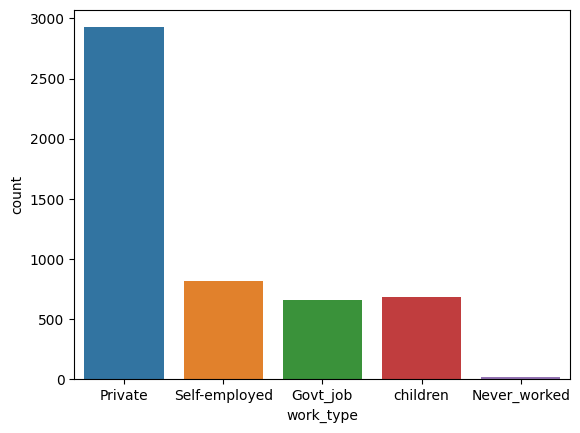

In [ ]:
sns.countplot(x="work_type", data=df)
plt.show()

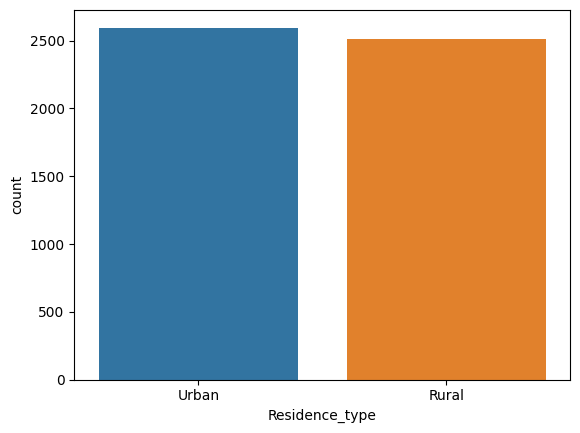

In [ ]:
sns. countplot(x="Residence_type", data=df)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

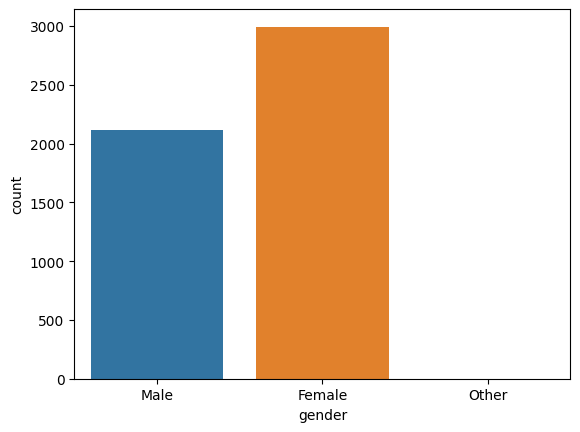

In [ ]:
sns.countplot(x="gender", data=df)

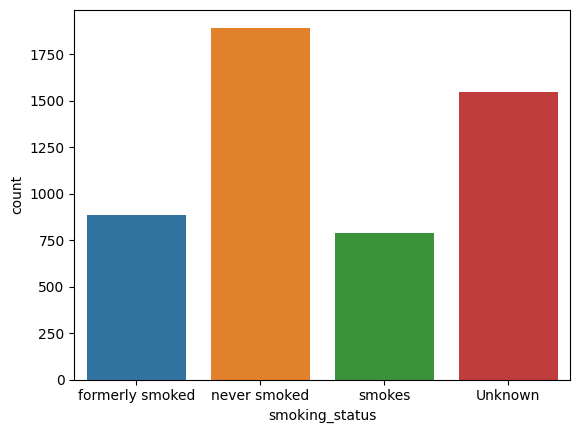

In [ ]:
sns.countplot(x="smoking_status", data=df)
plt.show()

In [ ]:
df.drop(["id"], axis=1, inplace=True)

In [ ]:
df["stroke"].fillna(df["stroke"].mode()[0], inplace=True)
df["Residence_type"].fillna(df["Residence_type"].mode()[0], inplace=True)
df["work_type"].fillna(df["work_type"].mode()[0], inplace=True)
df["bmi"].fillna(df["bmi"].mode()[0], inplace=True)

In [ ]:
le = LabelEncoder()

In [ ]:
df["gender"] = le.fit_transform(df["gender"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])
df["smoking_status"] = le.fit_transform(df["smoking_status"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["stroke"] = le.fit_transform(df["stroke"])

In [ ]:
scaler = StandardScaler()

In [ ]:
num_cols = ["hypertension", "heart_disease", "stroke"]

In [ ]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
corr_matrix = df.corr()

<ipython-input-25-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

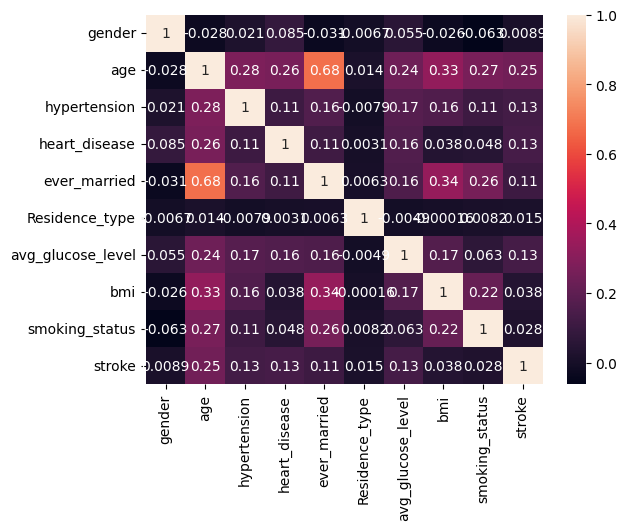

In [ ]:
sns.heatmap(corr_matrix, annot=True)

In [ ]:
plt.show()

In [ ]:
df.drop(["work_type"], axis=1, inplace=True)

In [ ]:
X = df.drop("stroke", axis=1)

In [ ]:
y = df["stroke"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numeric_features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

y_transformed = le.fit_transform(y)

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    full_model = Pipeline(steps=[("preprocessor", preprocessor),
                                  ("classifier", model)])

    full_model.fit(X_train, y_train)
    y_pred = full_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Model:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


RandomForest Model:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[959   1]
 [ 62   0]]

LogisticRegression Model:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit


KNeighbors Model:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[956   4]
 [ 62   0]]

DecisionTree Model:
Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.19      0.21        62

    accuracy                           0.91      1022
   macro avg       0.58      0.57      0.58      1022
weighted avg       0.90      0.91      0.91      1022

Confusion Matrix:
 [[917  43]
 [ 50  12]]


In [ ]:
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nPredictions:")
print(predictions_df.head())



Predictions:
      Actual  Predicted
4688       0          0
4478       0          0
3849       0          0
4355       0          0
3826       0          0


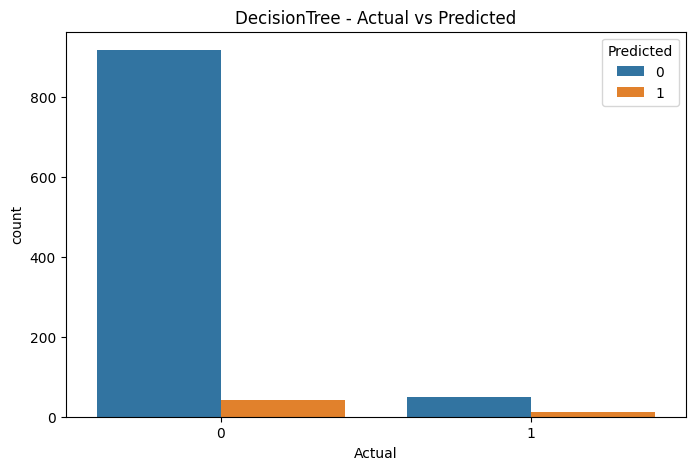

In [ ]:
  # Plot actual vs predicted
plt.figure(figsize=(8, 5))
sns.countplot(x="Actual", hue="Predicted", data=predictions_df)
plt.title(f"{model_name} - Actual vs Predicted")
plt.show()
